In [1]:
import numpy as np
from mockFactory import *

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [152]:
plt.rcParams.update({"font.size":20})

In [3]:
NFWPosition(10**10)

1


[0.02101103170376693, 0.0034664586922000537, 0.006144178955279852]

In [5]:
haloConcentration(2*10**11)

7

In [3]:
from colossus.halo import concentration

In [8]:
concentration.modelBullock01(10**11, 0.84)

(6.797242929759987, True)

In [24]:
%%time
concentration.concentration(np.logspace(10, 15, 2000), "vir", 0.84, model="bullock01")

CPU times: user 5.36 s, sys: 68.8 ms, total: 5.43 s
Wall time: 5.41 s


array([9.27684249, 9.27264271, 9.26844363, ..., 2.97807972, 2.97676763,
       2.97545928])

In [31]:
from scipy.interpolate import interp1d
f = interp1d(np.linspace(9,15,200), 
             concentration.concentration(10**np.linspace(9, 15.1, 200), "vir", 0.84, model="bullock01"))

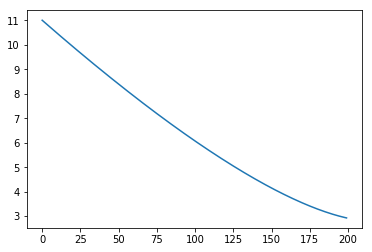

In [32]:
plt.plot(concentration.concentration(np.logspace(9, 15.1, 200), "vir", 0.84, model="bullock01"))

In [23]:
cvir

6.162291501962872

In [22]:
rvir

0.24107934936157766

In [24]:
rs

0.03912170485359006

In [25]:
max_p

0.004808232031372421

In [27]:
pr

0.5826440364007678

In [16]:
%%time
r_s = []
for _ in range(10000):
    r = NFWPosition(10.0**12)
    r_s.append(np.sqrt(r[0]**2 + r[1]**2 + r[2]**2))

CPU times: user 23.9 s, sys: 210 ms, total: 24.1 s
Wall time: 24 s


In [10]:
import bisect
def pdf(x):
    return np.log(x+1) - x/(x+1)

def dx(x):
    return x / (x+1)**2

def newton(x0, y):
    e = 10**-6
    x = 0
    it = 0
    while abs(x - x0) > e:
        it += 1
        x = x0
        x0 = x - (pdf(x) - y) / dx(x)
    return x0

interval = 10**-2
table = pdf(np.arange(0, 10, interval))

def get_x0(y):
    idx = bisect.bisect_left(table, y)
    return idx * interval

m = 10.0**12
cvir = haloConcentration(m)
rvir = pow(3*m / (4*DELTA_HALO*np.pi*RHO_CRIT*OMEGA_M), 1.0/3.0)
rs = rvir/cvir

def myNFWposition(m):
    y = np.random.rand() * pdf(cvir)
    return rs*newton(get_x0(y), y)

In [12]:
%%time
my_r_s = [myNFWposition(10.0**12) for _ in range(100000)]

CPU times: user 1.35 s, sys: 98.6 ms, total: 1.45 s
Wall time: 1.37 s


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in multiply
  # This is added back by InteractiveShellApp.init_path()


'\nwhile True:\n    r = np.random.rand() * rvir\n    pr = NFWDensity(r,rs,1.0)*r*r*4.0*np.pi / max_p\n\n    if np.random.rand() <= pr:\n        costheta = 2.0*np.random.rand() - 1\n        sintheta = np.sqrt(1-costheta**2)\n        phi = 2*np.pi*np.random.rand()\n\n[r*sintheta*np.cos(phi), r*sintheta*np.sin(phi), r*costheta]\n'

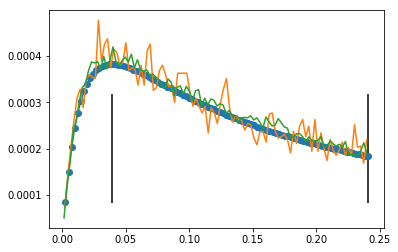

In [17]:
m = 10.0**12
cvir = haloConcentration(m)
rvir = pow(3*m / (4*DELTA_HALO*np.pi*RHO_CRIT*OMEGA_M), 1.0/3.0)
rs = rvir/cvir
max_p = NFWDensity(rs,rs,1.0)*rs*rs*4.0*np.pi

#plt.yscale("log")
#plt.xscale("log")
r = np.logspace(np.log10(0.0001), np.log10(100*rvir), 100)
r = np.linspace(0, rvir, 100)
plt.plot(r, r**2*NFWDensity(r, rs, 1.0), 'o-')
ymin, ymax = plt.ylim()
plt.vlines(rs, ymin*1.2, ymax*0.8, label="Rs")
plt.vlines(rvir, ymin*1.2, ymax*0.8, label="Rvir")
#locs += [rs, rvir]
#labels += ["Rs", "Rvir"]
histo, bins = np.histogram(r_s, bins=100)
plt.plot((bins[:-1]+bins[1:])/2, histo/350000)

histo, bins = np.histogram(my_r_s, bins=100)
plt.plot((bins[:-1]+bins[1:])/2, histo/3500000)

'''
while True:
    r = np.random.rand() * rvir
    pr = NFWDensity(r,rs,1.0)*r*r*4.0*np.pi / max_p

    if np.random.rand() <= pr:
        costheta = 2.0*np.random.rand() - 1
        sintheta = np.sqrt(1-costheta**2)
        phi = 2*np.pi*np.random.rand()

[r*sintheta*np.cos(phi), r*sintheta*np.sin(phi), r*costheta]
'''

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in multiply
  # This is added back by InteractiveShellApp.init_path()


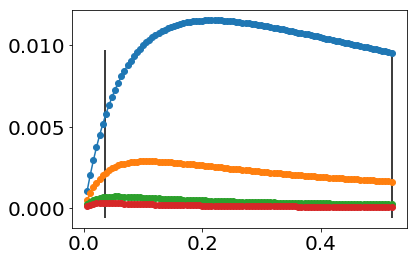

In [202]:
for fac in [0.5, 1,2,3]:
    cvir = haloConcentration(m) * fac
    rvir = pow(3*m / (4*DELTA_HALO*np.pi*RHO_CRIT*OMEGA_M), 1.0/3.0)
    rs = rvir/cvir
    max_p = NFWDensity(rs,rs,1.0)*rs*rs*4.0*np.pi

    #plt.yscale("log")
    #plt.xscale("log")
    r = np.logspace(np.log10(0.0001), np.log10(100*rvir), 100)
    r = np.linspace(0, rvir, 100)
    plt.plot(r, r**2*NFWDensity(r, rs, 1.0), 'o-')
ymin, ymax = plt.ylim()
plt.vlines(rs, ymin*1.2, ymax*0.8, label="Rs")
plt.vlines(rvir, ymin*1.2, ymax*0.8, label="Rvir")

# mock clustering

In [58]:
xi_NGC_newbin = np.loadtxt("../../ELG_HOD/data/xi/xi_NGC_clustering_catalog_v5_1_newbin.dat")
xi_SGC_newbin = np.loadtxt("../../ELG_HOD/data/xi/xi_SGC_clustering_catalog_v5_1_newbin.dat")
wp_NGC_newbin = np.loadtxt("../../ELG_HOD/data/wp/wp_NGC_clustering_catalog_v5_1_fkp_newbin.dat")
wp_SGC_newbin = np.loadtxt("../../ELG_HOD/data/wp/wp_SGC_clustering_catalog_v5_1_fkp_newbin.dat")
eff_area = [438.5493, 390.7814, 829.3308]
xi_data = (xi_SGC_newbin*eff_area[0] + xi_NGC_newbin*eff_area[1]) / eff_area[2]
wp_data = (wp_SGC_newbin*eff_area[0] + wp_NGC_newbin*eff_area[1]) / eff_area[2]

In [227]:
xi_sl, wp_sl = [], []
for i in range(10):
    xi_sl.append(np.loadtxt("xi{}.dat".format(i)))
    wp_sl.append(np.loadtxt("wp{}.dat".format(i)))

In [229]:
xi0_tinker = np.loadtxt("xi0_tinker.dat")
wp0_tinker = np.loadtxt("wp0_tinker.dat")

In [212]:
xi_test = np.loadtxt("../data/xi.dat")
wp_test = np.loadtxt("../data/wp.dat")

In [55]:
xi_qpm = np.loadtxt("../../ELG_HOD/data/run17/xi_out.TEST45")
wp_qpm = np.loadtxt("../../ELG_HOD/data/run17/wp_out.TEST45")

In [120]:
xi_qpm_corrfunc = np.loadtxt("xi_mock45.dat")
wp_qpm_corrfunc = np.loadtxt("wp_mock45.dat")

OMEGA_M		0.29
M_min           0
M1              1.99576840607e+14
M_max           1.00E+15
M_cut           1.45690882049e+12
alpha           0.899309153294
GALAXY_DENSITY  0.00057
MaxCen          0.0919869695747
sigma_logM      0.640647507034

pdfs            2
pdfc            6

VBIAS           0.668500987961
VBIAS_C		0
SIGV		0
CVIR_FAC      1.02225379337

In [205]:
rbins = np.logspace(np.log10(0.1), np.log10(70), 21)

In [206]:
r = (rbins[1:]**3 - rbins[:-1]**3) / (rbins[1:]**2 - rbins[:-1]**2) * 2 / 3

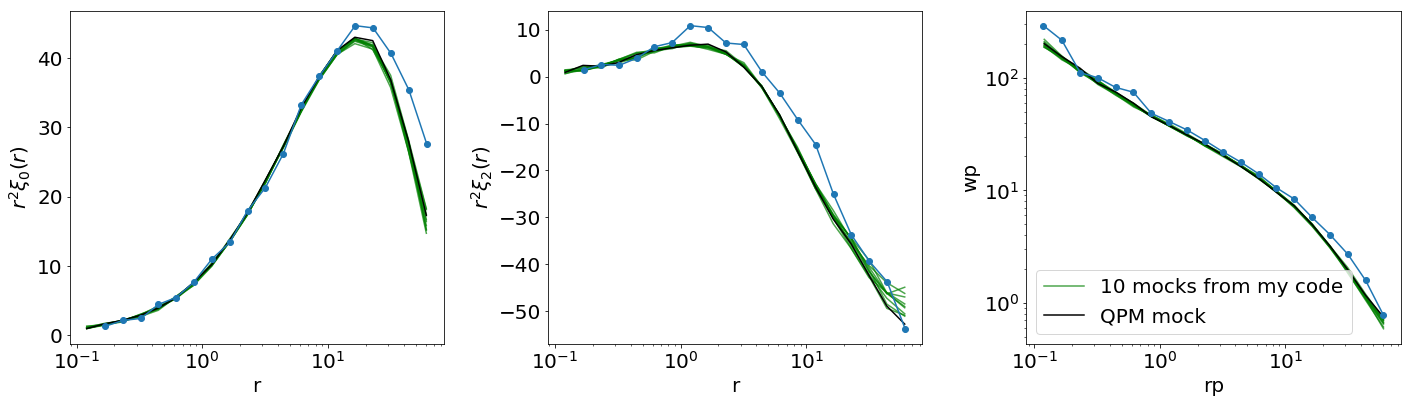

In [240]:
plt.figure(figsize=(20,6))
plt.subplot(131)
for xi in xi_sl[1:]:
    plt.plot(r, r**2*xi[:,1], 'g', alpha=0.7)
#plt.plot(r, r**2*xi_sl[0][:,1], 'r', alpha=1)
#plt.plot(xi_qpm[:,0], xi_qpm[:,0]**2*xi_qpm[:,1], 'k')
plt.plot(r, r**2*xi_qpm_corrfunc[:,1], 'k')
plt.plot(xi_data[:,0], xi_data[:,0]**2*xi_data[:,1],'o-')
plt.xscale("log")
plt.xlabel(r"r")
plt.ylabel(r"$r^2\xi_0(r)$")

plt.subplot(132)
for xi in xi_sl[1:]:
    plt.plot(r, r**2*xi[:,2], 'g', alpha=0.7)
#plt.plot(r, r**2*xi_sl[0][:,2], 'r', alpha=1)
#plt.plot(xi_qpm[:,0], xi_qpm[:,0]**2*xi_qpm[:,3], 'k')
plt.plot(r, r**2*xi_qpm_corrfunc[:,2], 'k')
plt.plot(xi_data[:,0], xi_data[:,0]**2*xi_data[:,3],'o-')
plt.xscale("log")
plt.xlabel(r"r")
plt.ylabel(r"$r^2\xi_2(r)$")

plt.subplot(133)
i = 1
for wp in wp_sl[1:]:
    label = "10 mocks from my code" if i == 1 else ""
    plt.plot(wp[:,2], wp[:,3], 'g', alpha=0.7, label=label)
    i += 1
#plt.plot(wp_sl[0][:,2], wp_sl[0][:,3], 'r', alpha=1, label="my code")
#plt.plot(wp_test[:,2], wp_test[:,3], 'b')
#plt.plot(wp_qpm[:,0], wp_qpm[:,1], 'k')
plt.plot(wp_qpm_corrfunc[:,2], wp_qpm_corrfunc[:,3], 'k', label="QPM mock")
plt.plot(wp_data[:,0], wp_data[:,1],'o-')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("rp")
plt.ylabel("wp")
plt.legend()
plt.tight_layout()
#plt.savefig("../plot/clustering_compare.png", dpi=200)

In [66]:
qpmmock = np.loadtxt("TEST45.mock")

In [220]:
mymocks = []
for i in range(10):
    mymocks.append(np.loadtxt("mock{}.dat".format(i)))

In [115]:
qpmmock.shape

(573614, 8)

In [221]:
for mymock in mymocks:
    print(mymock.shape)

(788416, 8)
(580849, 8)
(581021, 8)
(580059, 8)
(582191, 8)
(580983, 8)
(581494, 8)
(581578, 8)
(581115, 8)
(581378, 8)


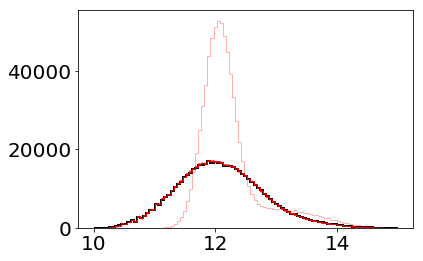

In [224]:
plt.hist(np.log10(qpmmock[:,6]), bins=np.linspace(10,15,100), histtype="step", color='k', lw=2);
for mymock in mymocks:
    plt.hist(np.log10(mymock[:,0]),bins=np.linspace(10,15,100), histtype="step", alpha=0.3, color='r');

Text(0.5,0,'$v_x$')

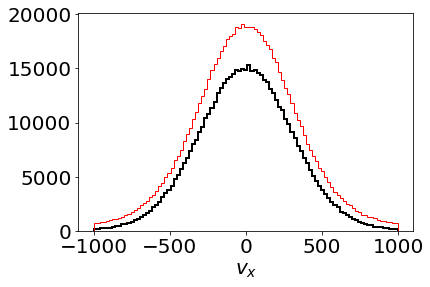

In [225]:
plt.hist(qpmmock[:,5], bins=np.linspace(-1000,1000,100), histtype="step", color='k', lw=2);
for mymock in mymocks[:1]:
    plt.hist(mymock[:,6],bins=np.linspace(-1000,1000,100), histtype="step", color='r', alpha=1);
plt.xlabel(r"$v_x$")
#plt.savefig("../plot/vx_hist.png", dpi=200)

In [183]:
print(qpmmock[qpmmock[:,7] == 0].shape, mymock[mymock[:,7] == 1].shape)
print(qpmmock[qpmmock[:,7] == 1].shape, mymock[mymock[:,7] == 0].shape)

(504722, 8) (512778, 8)
(68892, 8) (69304, 8)


In [226]:
for mymock in mymocks:
    print((mymock[:,7]==0).sum() / len(mymock))
print((qpmmock[:, 7]==1).sum() / len(qpmmock))

0.2057593960548746
0.1183732777365546
0.11901979446526029
0.1193516521595217
0.119228912848189
0.11942690233621293
0.11930647607713923
0.11828851847903463
0.11777875291465545
0.1187231026973845
0.12010167115865372


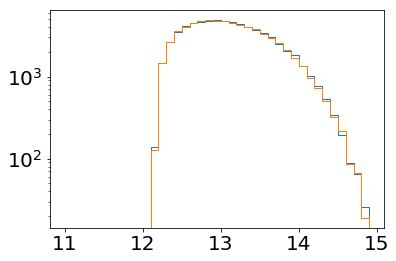

In [185]:
mymock = mymocks[0]
plt.hist(np.log10(mymock[mymock[:,7] == 0, 0]), bins=np.arange(11, 15, 0.1), histtype='step')
plt.hist(np.log10(qpmmock[qpmmock[:,7] == 1, 6]), bins=np.arange(11, 15, 0.1), histtype='step')
plt.yscale("log")

In [93]:
bins = np.arange(10,15,0.1)
halo_central = np.loadtxt("../../HAM/data/HOD/halo_central_histo.dat")

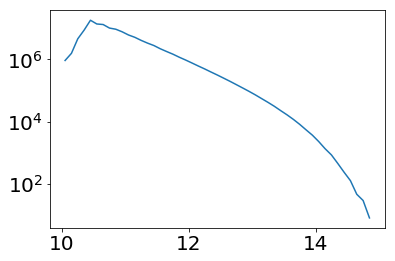

In [241]:
plt.plot((bins[1:]+bins[:-1])/2, halo_central)
plt.yscale("log")

In [108]:
M_min =          6.8*10**12
M1     =         1.99576840607e+14
M_cut   =        1.45690882049e+12
alpha   =        0.899309153294
MaxCen   =       0.0919869695747
sigma_logM  =    0.640647507034

from scipy.special import erf
def N_cen(m):
    f = 1
    x = (m - np.log10(M_min))/sigma_logM;
    return MaxCen*np.exp(-x*x/2);

@np.vectorize
def N_sat(m):
    f = 1
    m = 10**m
    if m<M_cut:
        return 0.0;
    return f*pow((m-M_cut)/M1,alpha)

In [117]:
gal_cen, _ = np.histogram(np.log10(qpmmock[qpmmock[:,7]==0,6]), bins=bins)
gal_sat, _ = np.histogram(np.log10(qpmmock[qpmmock[:,7]==1,6]), bins=bins)

In [118]:
my_gal_cen, _ = np.histogram(np.log10(mymock[mymock[:,7]==1,0]), bins=bins)
my_gal_sat, _ = np.histogram(np.log10(mymock[mymock[:,7]==0,0]), bins=bins)

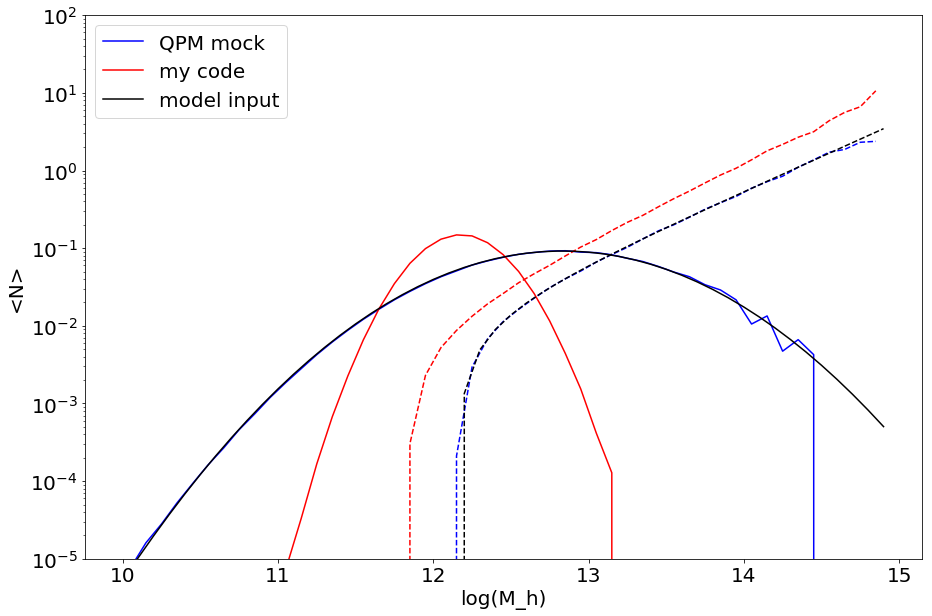

In [223]:
plt.figure(figsize=(15,10))
plt.plot((bins[1:]+bins[:-1])/2, gal_cen / halo_central, 'b', label="QPM mock")
plt.plot((bins[1:]+bins[:-1])/2, gal_sat / halo_central, 'b--')
for mymock in mymocks[:1]:
    my_gal_cen, _ = np.histogram(np.log10(mymock[mymock[:,7]==1,0]), bins=bins)
    my_gal_sat, _ = np.histogram(np.log10(mymock[mymock[:,7]==0,0]), bins=bins)
    plt.plot((bins[1:]+bins[:-1])/2, my_gal_cen / halo_central, 'r', alpha=1, label="my code")
    plt.plot((bins[1:]+bins[:-1])/2, my_gal_sat / halo_central, 'r--',  alpha=1)
plt.plot(bins, N_cen(bins), 'k', label="model input")
plt.plot(bins, N_sat(bins), 'k--')
plt.yscale('log')
plt.ylim((10**-5, 100))
plt.xlabel("log(M_h)")
plt.ylabel("<N>")
plt.legend()
#plt.savefig("../plot/hod.png", dpi=200)